In [1]:
# 检测书法文字
# 步骤：
# 1、读取图片，灰度、二值化处理
# 2、侵蚀去噪点
# 3、膨胀连接
# 4、闭合孔洞
# 5、边缘检测
# 6、画检测框

In [3]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

plt.rcParams['figure.dpi'] = 200

In [5]:
img = cv2.imread('./imgs/shufa.jpg')

In [6]:
gray = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)

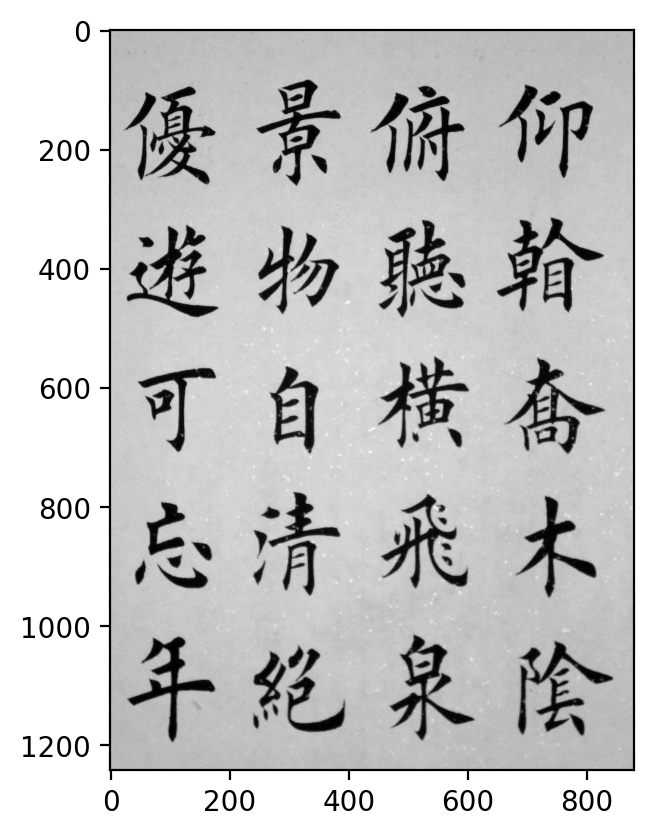

In [7]:
plt.imshow(gray,cmap='gray')

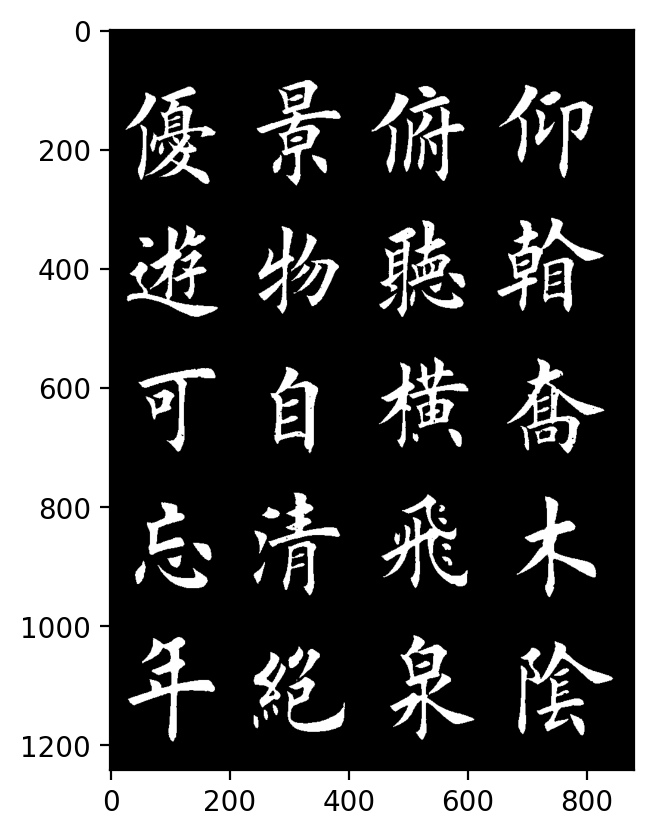

In [15]:
#二值化
#参数1：输入图片
#参数2：比较阈值
#参数3：超出阈值设定值
#参数4：模式

r,black_img = cv2.threshold(gray,100,255,cv2.THRESH_BINARY_INV)
plt.imshow(black_img,cmap='gray')

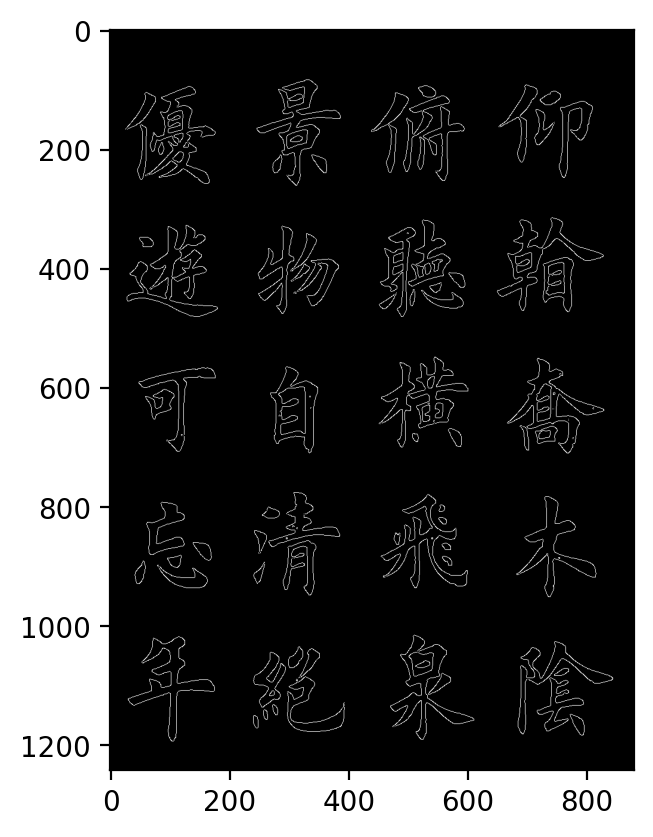

In [16]:
#边缘检测
edges = cv2.Canny(black_img,30,200)
plt.imshow(edges,cmap='gray')

In [17]:
#找轮廓
coutours,h = cv2.findContours(edges,cv2.RETR_EXTERNAL,cv2.CHAIN_APPROX_NONE)

In [22]:
img_copy = img.copy()
for c in coutours:
    #print(c)
    x,y,w,h = cv2.boundingRect(c)
    cv2.rectangle(img_copy,(x,y),(x+w,y+h),(0,255,0),3)

[[[ 476 1168]]]
[[[ 241 1149]]

 [[ 240 1150]]

 [[ 240 1151]]

 [[ 240 1152]]

 [[ 240 1153]]

 [[ 240 1154]]

 [[ 240 1155]]

 [[ 240 1156]]

 [[ 240 1157]]

 [[ 240 1158]]

 [[ 240 1159]]

 [[ 240 1160]]

 [[ 240 1161]]

 [[ 240 1162]]

 [[ 241 1163]]

 [[ 241 1164]]

 [[ 242 1165]]

 [[ 242 1166]]

 [[ 243 1167]]

 [[ 243 1168]]

 [[ 244 1169]]

 [[ 245 1170]]

 [[ 246 1170]]

 [[ 247 1170]]

 [[ 248 1169]]

 [[ 248 1168]]

 [[ 248 1167]]

 [[ 248 1166]]

 [[ 248 1165]]

 [[ 248 1164]]

 [[ 248 1163]]

 [[ 248 1162]]

 [[ 248 1161]]

 [[ 248 1160]]

 [[ 248 1159]]

 [[ 248 1158]]

 [[ 248 1157]]

 [[ 248 1156]]

 [[ 247 1155]]

 [[ 247 1154]]

 [[ 247 1153]]

 [[ 247 1152]]

 [[ 246 1151]]

 [[ 245 1151]]

 [[ 244 1150]]

 [[ 243 1149]]

 [[ 242 1149]]]
[[[ 772 1147]]

 [[ 771 1148]]

 [[ 772 1149]]

 [[ 772 1150]]

 [[ 772 1151]]

 [[ 773 1152]]

 [[ 773 1153]]

 [[ 774 1154]]

 [[ 774 1155]]

 [[ 775 1156]]

 [[ 775 1157]]

 [[ 776 1158]]

 [[ 776 1159]]

 [[ 776 1160]]

 [[ 776 

[[[328  83]]

 [[327  84]]

 [[326  84]]

 ...

 [[331  83]]

 [[330  83]]

 [[329  83]]]


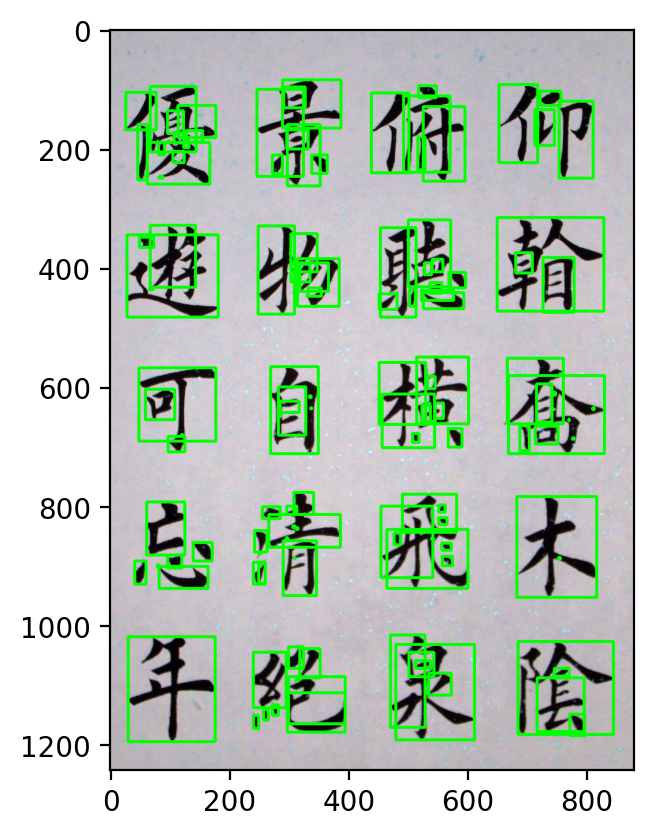

In [19]:
plt.imshow(img_copy)

In [23]:
#使用形态学变化
#先侵蚀，去噪点
kernel = np.ones((3,3),dtype=np.int8)
erosion1 = cv2.erode(black_img,kernel,iterations=1)

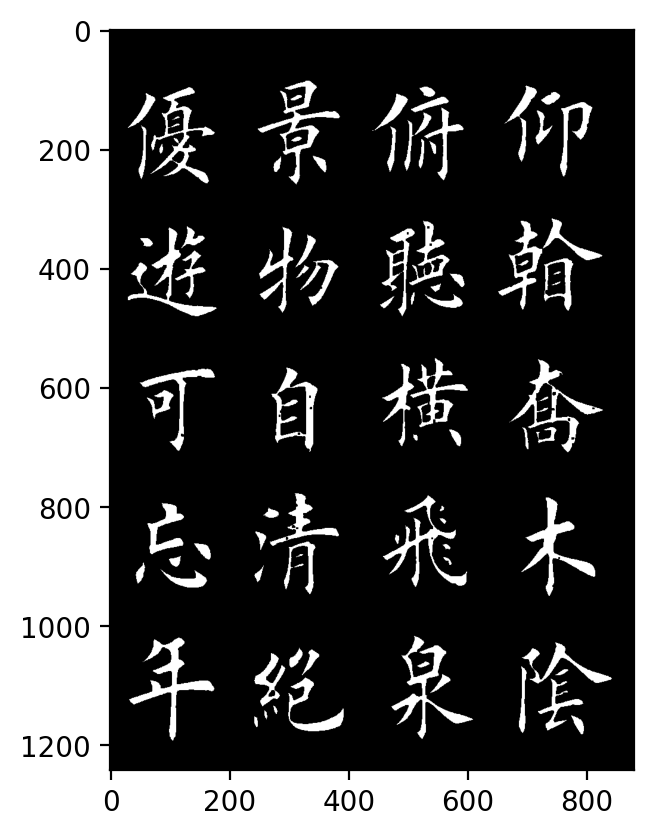

In [24]:
plt.imshow(erosion1,cmap='gray')

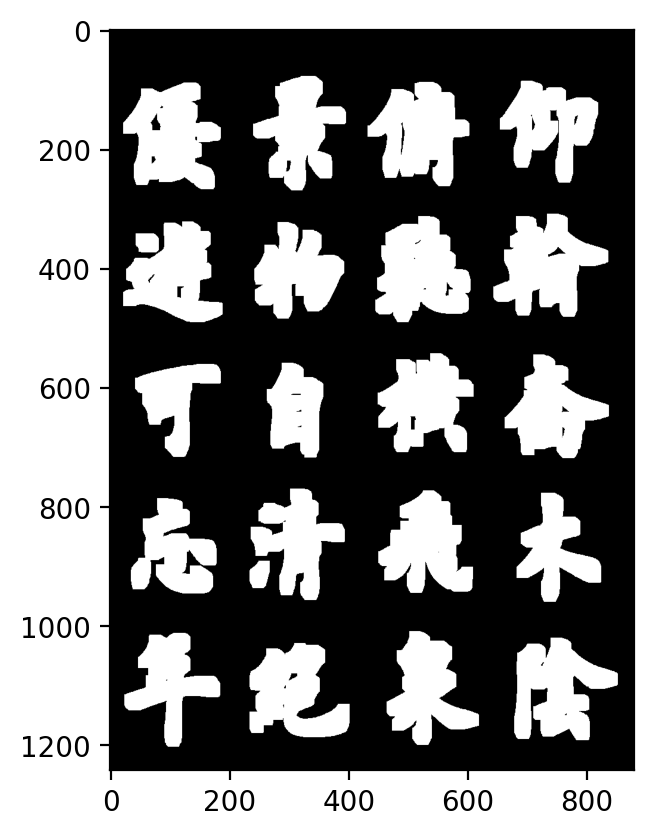

In [25]:
#再膨胀
kernel = np.ones((10,10),dtype=np.int8)
dilation = cv2.dilate(erosion1,kernel,iterations=2)
plt.imshow(dilation,cmap='gray')

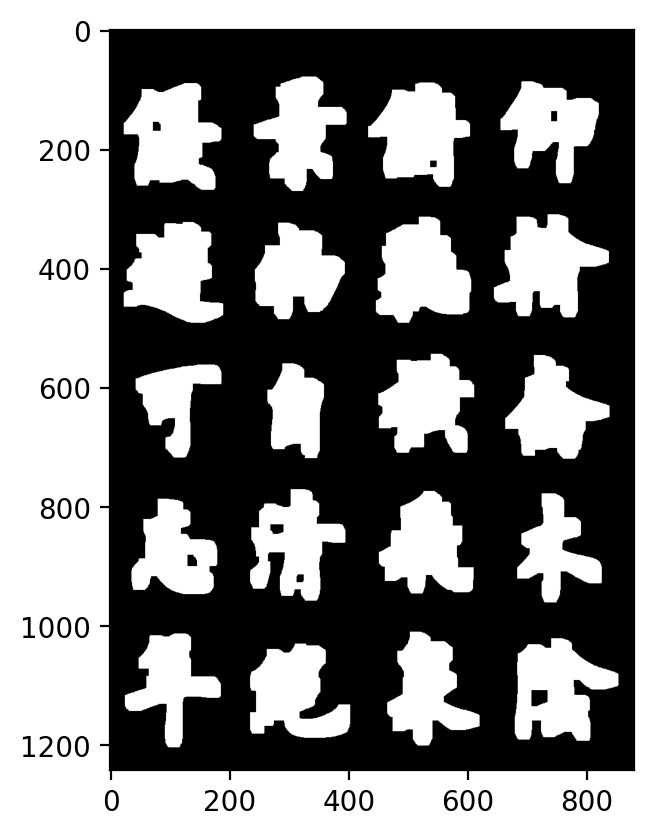

In [26]:
#闭合
kernel = np.ones((10,10),dtype=np.int8)
closing = cv2.morphologyEx(dilation,cv2.MORPH_CLOSE,kernel)
plt.imshow(closing,cmap='gray')

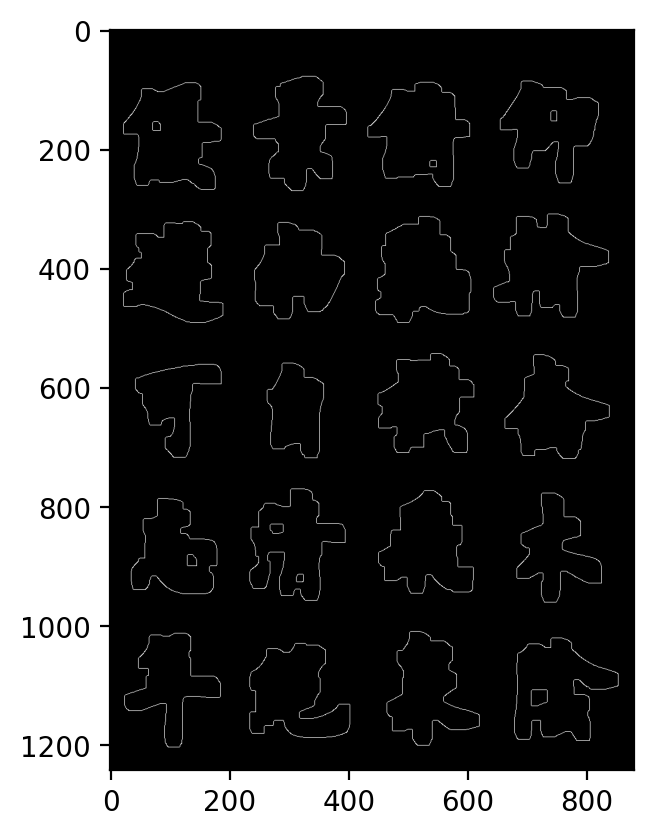

In [27]:
#边缘检测
edges1 = cv2.Canny(closing,30,200)
plt.imshow(edges1,cmap='gray')

In [28]:
#找轮廓
coutours1,h = cv2.findContours(edges1,cv2.RETR_EXTERNAL,cv2.CHAIN_APPROX_NONE)


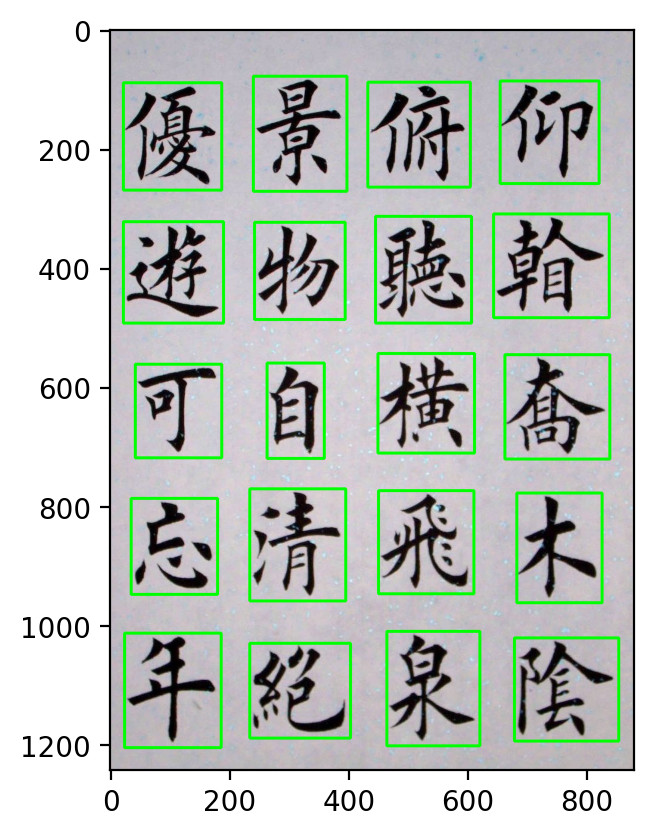

In [29]:
img_copy = img.copy()
for c in coutours1:
    x,y,w,h = cv2.boundingRect(c)
    cv2.rectangle(img_copy,(x,y),(x+w,y+h),(0,255,0),3)
plt.imshow(img_copy)